## Brief Introduction

Gross Domestic Product (or simply GDP), is an offical measure that sums everything produced by a country. Learning how this changed over time is a reliable way of determine how wealthy a country has been along the years.

In this analysis it is performed an investigation of how GDP and life expectancy of Chile, Mexico, Germany, USA, China and Zimbabwe changed between 2000 and 2015. A possible correlation between these two indicators, for each country, is also evaluated and quantified through basic linear regression.


## Data and Packages Importing

Importing packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from google.colab import data_table
data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings('ignore')

Importing file to be analysed

In [78]:
from google.colab import files
uploaded = files.upload()

Saving all_data.csv to all_data (2).csv


## Data Cleaning 

Quick looking at data

In [79]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Checking data types, number of rows and columns, and possible missing values

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Checking basic summary statistics and data ranges

In [81]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Inspecting 'Country' column, the only with strings

In [82]:
df['Country'].value_counts()

Germany                     16
Zimbabwe                    16
United States of America    16
Chile                       16
China                       16
Mexico                      16
Name: Country, dtype: int64

Since 'United States of America' is a string way bigger than other countries names in this analysis, it's quite usefull to change it to 'USA', to keep  tick labels tidy in future graphs.

In [83]:
df['Country'] = df['Country'].replace('United States of America','USA') 

##Life Expectancy Evolution

We can begin looking how life expectancy varied along the years in different countries.

Text(0.5, 1.0, 'Life Expectancy Evolution - All countries')

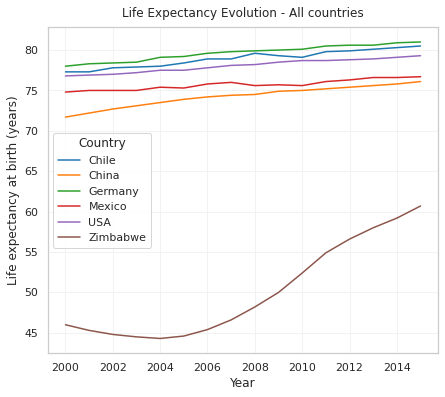

In [84]:
plt.figure(figsize=(7,6))
sns.set_style('whitegrid', {"grid.color": ".95"})
sns.lineplot(
    data=df, 
    x='Year', 
    y='Life expectancy at birth (years)', 
    hue='Country'
    )
plt.title('Life Expectancy Evolution - All countries', pad=10)

It is clear that Zimbabwe had life expectancy values way smaller than other countries, what makes it difficult to analyse it altogether. Let´s then plot two separate charts (with and without Zimbabwe), to better understand the data.

Text(0.5, 1.0, 'Life Expectancy Evolution - Only Zimbabwe')

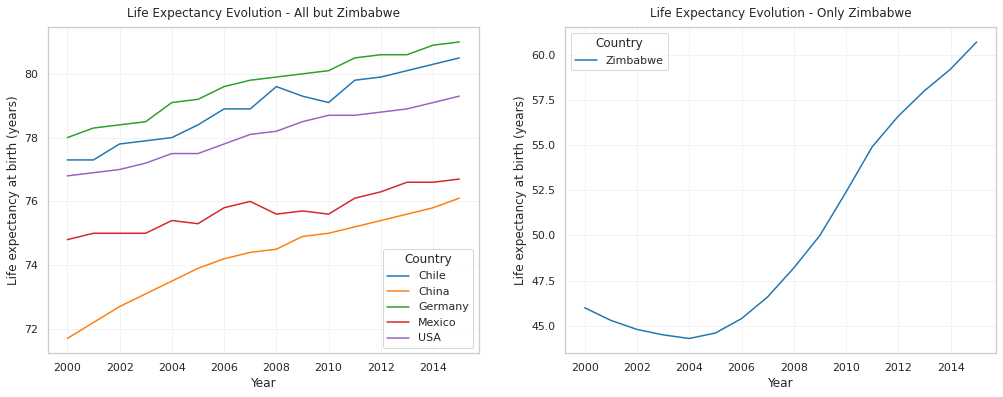

In [85]:
plt.figure(figsize=(17,6))
ax1 = plt.subplot(1,2,1)
ax1 =sns.lineplot(
    data=df, 
    x='Year', 
    y='Life expectancy at birth (years)', 
    hue=df.Country[df.Country != 'Zimbabwe']
    )
plt.title('Life Expectancy Evolution - All but Zimbabwe', pad=10)

ax2 = plt.subplot(1,2,2)
ax1 =sns.lineplot(
    data=df, 
    x='Year', 
    y='Life expectancy at birth (years)', 
    hue=df.Country[df.Country == 'Zimbabwe']
    )
plt.title('Life Expectancy Evolution - Only Zimbabwe', pad=10)

On the left graph, it's clear that all the countries showed an evolution on life expectancy throughout time. China was the country with quicker improvement along the years, but in 2014 was still the one with smaller values when compared to Chile, Germany, Mexico and USA.

On the right graph, on the other hand, Zimbabwe's life expectation worsened between 2000 and 2004, quickly improving from this year on. It's not easy to exactly determine why Zimbabwe was the only country not to show a continuous improvment, but extreme poverty and turbulent internal political environment seem to be determinant to make things more difficult.

##Gross Domestic Product (GDP) Evolution

We can now analyse how each country's GDP changed over time.

Since most GDP values are within the 'trillion dollars' magnitude order, it's useful to change how they're presented here

Text(0.5, 1.0, 'GDP Evolution')

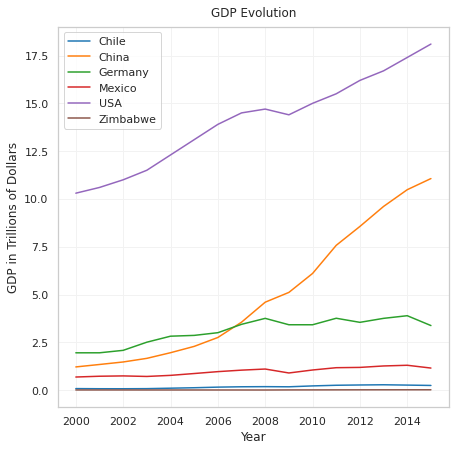

In [86]:
df['GDP in Trillions of Dollars'] = df.GDP/1e12

plt.figure(figsize=(7, 7))
sns.set_style('whitegrid', {"grid.color": ".95"})
ax = sns.lineplot(
    data=df, 
    x='Year', 
    y='GDP in Trillions of Dollars', 
    hue='Country'
    )
plt.legend(df.Country.unique())
plt.title('GDP Evolution', pad=10)

It's not a surprise to see USA with the highest GDP along the years, since it has been the biggest economy for decades. China, once again, shows a great improvement in just a bit more than a decade. Around 2008 nearly all countries seem to show a GDP reduction, even though at different levels. The main reason is most probabily the global economic crisis, originated at 2008 in the USA, with the subprime mortgage meltdown.

Text(0.5, 1.0, 'GDP Evolution - Lowest GDPs')

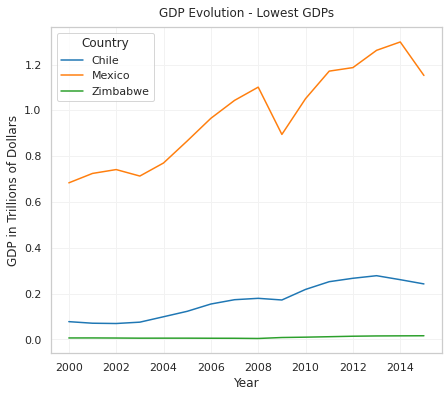

In [87]:
plt.figure(figsize=(7, 6))
sns.set_style('whitegrid', {"grid.color": ".95"})
sns.lineplot(
    data=df, 
    x='Year', 
    y='GDP in Trillions of Dollars', 
    hue=df.Country[(df.Country == 'Zimbabwe') |
                   (df.Country == 'Chile') |
                   (df.Country == 'Mexico')]
    )
plt.title('GDP Evolution - Lowest GDPs', pad=10)

Looking specifically to Chile, Mexico and Zimbabwe (countries with the lowest GDP among the studied), we can see that Mexico falls within the same behavior than developed countries, with GDP values improving along time, but feeling a strong setback around 2008. Chile also seems to improve along time, on average. But is nearly impossible to draw any conclusions about Zimbabwe. Let's then plot a separate graph, this time with values in billions of dollars

Text(0.5, 1.0, 'GDP Evolution - Only Zimbabwe')

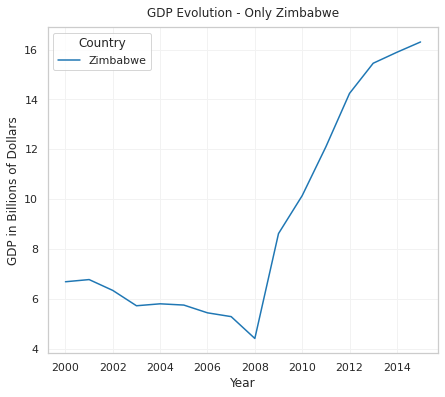

In [88]:
df['GDP in Billions of Dollars'] = df.GDP/1e9

plt.figure(figsize=(7, 6))
sns.set_style('whitegrid', {"grid.color": ".95"})
sns.lineplot(
    data=df, 
    x='Year', 
    y='GDP in Billions of Dollars', 
    hue=df.Country[(df.Country == 'Zimbabwe')]
    )
plt.title('GDP Evolution - Only Zimbabwe', pad=10)

Instead of getting worse, we can see that 2008 was a pivotal moment to Zimbabwe's economy, with a massive improvement following on. It is quite obvious now that this country was less vulnerable to internation economic turmoil, with internal affairs playing a more decisive role in it's development. Clearly a further study is necessary to fully comprehend Zimbabwe's economic change throughout time, but seems to be a concensus that adopting the american dollar as a official national currency (and dropping their own) helped this matter, even though caused deep problems in others sectors(1,2)

(1) http://news.bbc.co.uk/1/hi/7859033.stm

(2) https://www.economist.com/middle-east-and-africa/2016/07/09/bailing-out-bandits

##GDP versus Life Expectancy


Let's now analyse a possible correlation between GDP improvement and life expectancy increase. 

Since we already kwow that the analysed countries presented quite different values (both in GDP and life expectancy), it's better to breakdown the data in separate 'chunks'.

First, just Chile, Germany and Mexico.

Text(0.5, 1.0, 'Life Expectancy vs GDP in Chile, Germany and Mexico')

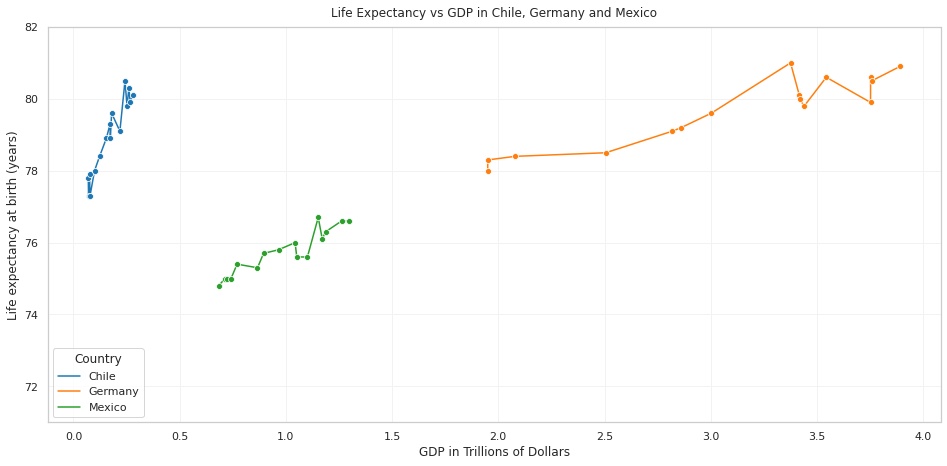

In [89]:
plt.figure(figsize=(16,16))

ax3 = plt.subplot(211)
sns.set_style('whitegrid', {"grid.color": ".95"})
ax3 = sns.lineplot(
    data=df, y='Life expectancy at birth (years)', 
    x='GDP in Trillions of Dollars', 
    marker='o', 
    hue=df.Country[(df.Country == 'Chile') |
                   (df.Country == 'Germany') |
                   (df.Country == 'Mexico')]
    )
plt.ylim([71,82])
plt.title('Life Expectancy vs GDP in Chile, Germany and Mexico', pad=10)

Now China and USA, but changing the x-axis scale.

Text(0.5, 1.0, 'Life Expectancy vs GDP in China and USA')

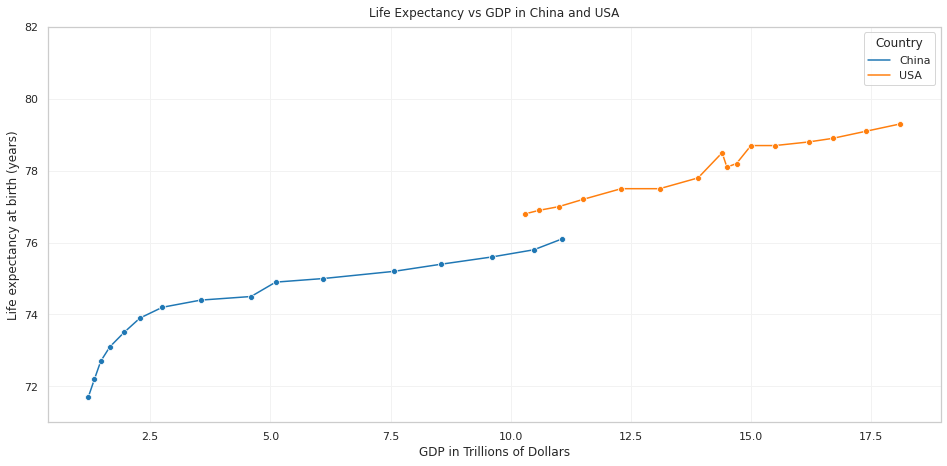

In [90]:
plt.figure(figsize=(16,16))
ax4 = plt.subplot(212)
sns.set_style('whitegrid', {"grid.color": ".95"})
ax4 = sns.lineplot(
    data=df, 
    y='Life expectancy at birth (years)', 
    x='GDP in Trillions of Dollars', 
    marker='o', 
    hue=df.Country[(df.Country == 'USA') |
                   (df.Country == 'China')]
    )
plt.ylim([71,82])
plt.title('Life Expectancy vs GDP in China and USA', pad=10)

Using the same y-axis (but different x-axis) for both graphs it's easier to conclude that indubitably an increase in GDP is directly associated to a life expectancy increase. This correlation looks stronger in countries that presented a GDP value smaller that 2.5 Trillions of Dollars back in the 2000s (i.e. Chile, Germany and China). 


Text(0.5, 1.0, 'Life Expectancy vs GDP - Only Zimbabwe')

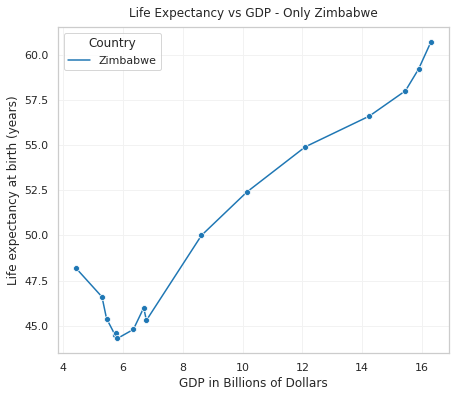

In [91]:
plt.figure(figsize=(7,6))
ax = plt.subplot(111)
sns.set_style('whitegrid', {"grid.color": ".95"})
ax = sns.lineplot(
    data=df, 
    y='Life expectancy at birth (years)', 
    x='GDP in Billions of Dollars',
    marker='o', 
    hue=df.Country[df.Country == 'Zimbabwe']
    )
plt.title('Life Expectancy vs GDP - Only Zimbabwe', pad=10)


Looking at the big picture, Zimbabwe also fits the same pattern (bigger GDP, higher the life expectancy). But, obviously, the observed retracement can't also be ignored. As already discussed, Zimbabwe's reality was (and still is) completely different from the other presented countries. Right before 2008 the country experienced one of the biggest economic hyperinflations in the world, that made the population's purchasing power drastically decrease. The main consequence was making even harder to access essential products like food and medicine (3), therefore negatively impacting the life expectancy.

(3) http://news.bbc.co.uk/1/hi/world/africa/7115651.stm

In order to quantify the GDP and life expectancy correlation, let's analyse both slope and r-values from all countries data.

In [92]:
slope = []
r_value = []

for country in df.Country.unique(): 
  df_filt = df[df.Country == country]
  lin_reg = linregress(df_filt['GDP in Trillions of Dollars'], df_filt['Life expectancy at birth (years)'])
  slope.append(lin_reg.slope)
  r_value.append(lin_reg.rvalue)

To easily understand the data, let's vizualize it as an interactive dataframe

In [93]:
df_lin_reg = pd.DataFrame()
df_lin_reg['country'] = df.Country.unique()
df_lin_reg['slope'] = slope
df_lin_reg['r_value'] = r_value

df_lin_reg

,country,slope,r_value
0,Chile,13.083372,0.949877
1,China,0.342022,0.908526
2,Germany,1.362397,0.932699
3,Mexico,2.762337,0.932238
4,USA,0.335981,0.981709
5,Zimbabwe,1335.298808,0.966200


The larger the slope value, in this case, more sensible the country's life expectancy was to a change in the GDP value. In other words, high slope values indicate that a small increase in GDP value resulted in a rapid life expectancy increase.

Zimbabwe (by far) and Chile were the analysed countries with higher slope values, while USA and China presented the smallest.

The closest to '1.0' as the r-value gets, the stronger the correlation between GDP and life expectancy is. 

USA's data presented the strongest correlation, while China the weakest. Even though, all countries data presented a really strong correlation, no smaller than 90%



## Conclusions

So, it's safe to conclude that between 2000 and 2015 there was a very strong correlation between GDP increase and improvement in life expectancy in all countries studied, with USA leading the way (98,17% of correlation). As showed, this correlation was also strong even in Zimbabwe (96,62% of correlation), showing that even in regions facing internal strugles, is reasonable to expect people to live more, if the country's wealth is improved.

Also, smaller economies (like Chile, Mexico, Zimbabwe, and even China in early 2000s) when compared to USA, for example, seem to positively respond way quicker to small increases in it's GDP values, resulting in high increases in it's population's life expectancy. This was quantified through the linear regressions slopes, with Zimbabwe presenting the higher value (1335, dimensionless).
